In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load your dataset
data = pd.read_csv('Temp Plot(2).csv')

In [3]:
data.head()

,Date,Rainfall(inch),Temperature(0.9m),Temperature(1.8m),Air Temp F,Air Temp C
0,10/3/2016,0.00,25.567,26.171,75.9,24.388889
1,10/4/2016,0.00,25.713,26.100,78.6,25.888889
2,10/5/2016,0.06,25.946,26.100,82.6,28.111111
3,10/6/2016,0.39,26.446,26.158,82.8,28.222222
4,10/7/2016,0.00,26.663,26.300,72.3,22.388889


In [4]:
data.tail()

,Date,Rainfall(inch),Temperature(0.9m),Temperature(1.8m),Air Temp F,Air Temp C
1160,12/7/2019,0.00,15.429,16.700,NaN,NaN
1161,12/8/2019,0.00,15.346,16.700,NaN,NaN
1162,12/9/2019,0.32,15.329,16.625,NaN,NaN
1163,12/10/2019,0.00,15.558,16.650,NaN,NaN
1164,12/11/2019,NaN,15.331,16.694,NaN,NaN


In [5]:
data.shape

(1165, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1165 non-null   object 
 1   Rainfall(inch)     1164 non-null   float64
 2   Temperature(0.9m)  1153 non-null   float64
 3   Temperature(1.8m)  812 non-null    float64
 4   Air Temp F         1154 non-null   float64
 5   Air Temp C         1154 non-null   float64
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [7]:
data.describe()

,Rainfall(inch),Temperature(0.9m),Temperature(1.8m),Air Temp F,Air Temp C
count,1164.000000,1153.000000,812.000000,1154.000000,1154.000000
mean,0.071375,20.592140,21.291655,68.545061,20.302811
std,0.252763,5.890783,4.989298,15.818195,8.787886
min,0.000000,8.504000,11.200000,23.200000,-4.888889
25%,0.000000,15.467000,17.126750,56.625000,13.680556
50%,0.000000,20.271000,20.635500,70.450000,21.361111
75%,0.000000,25.983000,25.717750,82.400000,28.000000
max,4.140000,30.808000,29.700000,97.000000,36.111111


In [8]:
data.isnull().sum()

Date                   0
Rainfall(inch)         1
Temperature(0.9m)     12
Temperature(1.8m)    353
Air Temp F            11
Air Temp C            11
dtype: int64

#### Feature Engineering

In [9]:
#Handling Missing values
# Mean imputation for missing values
data['Rainfall(inch)'].fillna(data['Rainfall(inch)'].mean(), inplace=True)
data['Temperature(0.9m)'].fillna(data['Temperature(0.9m)'].mean(), inplace=True)
data['Temperature(1.8m)'].fillna(data['Temperature(1.8m)'].mean(), inplace=True)
data['Air Temp F'].fillna(data['Air Temp F'].mean(), inplace=True)
data['Air Temp C'].fillna(data['Air Temp C'].mean(), inplace=True)


In [10]:
data.isnull().sum()

Date                 0
Rainfall(inch)       0
Temperature(0.9m)    0
Temperature(1.8m)    0
Air Temp F           0
Air Temp C           0
dtype: int64

In [11]:
data.head()

,Date,Rainfall(inch),Temperature(0.9m),Temperature(1.8m),Air Temp F,Air Temp C
0,10/3/2016,0.00,25.567,26.171,75.9,24.388889
1,10/4/2016,0.00,25.713,26.100,78.6,25.888889
2,10/5/2016,0.06,25.946,26.100,82.6,28.111111
3,10/6/2016,0.39,26.446,26.158,82.8,28.222222
4,10/7/2016,0.00,26.663,26.300,72.3,22.388889


#### Creating Important columns for the research paper provided
1. Solar radiation
2. Daily Precipitation
3. day of the year

In [13]:
#creating day of year column

data['Date'] = pd.to_datetime(data['Date'])
data['day_of_year'] = data['Date'].dt.dayofyear

In [14]:
#creating solar radiation column
#Solar Radiation = (Air Temp C * 20) - (Rainfall * 10)
data['Solar Radiation(W/m²)'] = (data['Air Temp C'] * 20) - (data['Rainfall(inch)'] * 10)


In [15]:
# Create Daily Precipitation column in millimeters
data['Precipitation (mm)'] = data['Rainfall(inch)'] * 25.4

In [16]:
data.head()

,Date,Rainfall(inch),Temperature(0.9m),Temperature(1.8m),Air Temp F,Air Temp C,day_of_year,Solar Radiation(W/m²),Precipitation (mm)
0,2016-10-03,0.00,25.567,26.171,75.9,24.388889,277,487.777778,0.000
1,2016-10-04,0.00,25.713,26.100,78.6,25.888889,278,517.777778,0.000
2,2016-10-05,0.06,25.946,26.100,82.6,28.111111,279,561.622222,1.524
3,2016-10-06,0.39,26.446,26.158,82.8,28.222222,280,560.544444,9.906
4,2016-10-07,0.00,26.663,26.300,72.3,22.388889,281,447.777778,0.000


In [17]:
#Droping irrelevant features
data.drop(columns=['Date','Rainfall(inch)','Air Temp F'],axis=1,inplace=True)

In [18]:
data.head()

,Temperature(0.9m),Temperature(1.8m),Air Temp C,day_of_year,Solar Radiation(W/m²),Precipitation (mm)
0,25.567,26.171,24.388889,277,487.777778,0.000
1,25.713,26.100,25.888889,278,517.777778,0.000
2,25.946,26.100,28.111111,279,561.622222,1.524
3,26.446,26.158,28.222222,280,560.544444,9.906
4,26.663,26.300,22.388889,281,447.777778,0.000


In [19]:
#Target variable
# Assuming GBC Temperature is the average of Temperature(0.9m) and Temperature(1.8m)

data['GBC Temperature (°C)'] = (data['Temperature(0.9m)'] + data['Temperature(1.8m)']) / 2

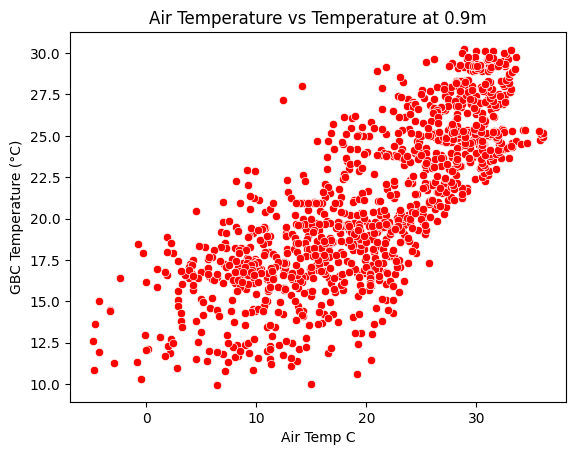

In [20]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['Air Temp C'], y=data['GBC Temperature (°C)'],color='r')
plt.title('Air Temperature vs Temperature at 0.9m')
plt.show()


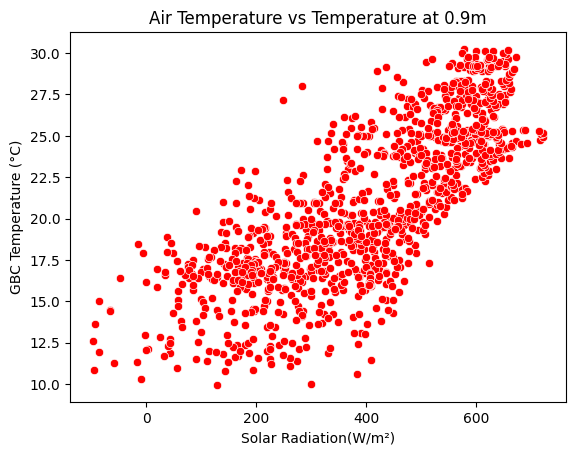

In [21]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['Solar Radiation(W/m²)'], y=data['GBC Temperature (°C)'],color='r')
plt.title('Air Temperature vs Temperature at 0.9m')
plt.show()

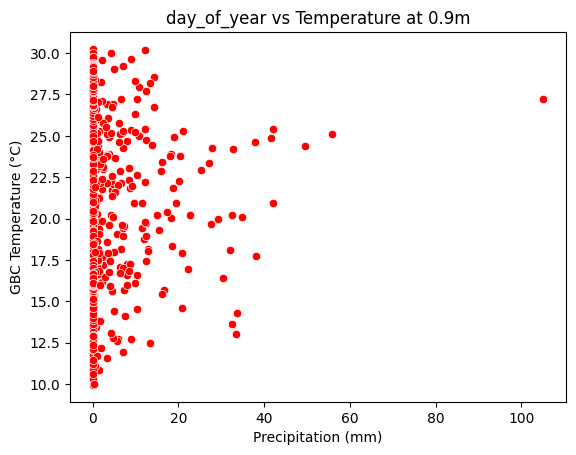

In [22]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['Precipitation (mm)'], y=data['GBC Temperature (°C)'],color='r')
plt.title('day_of_year vs Temperature at 0.9m')
plt.show()

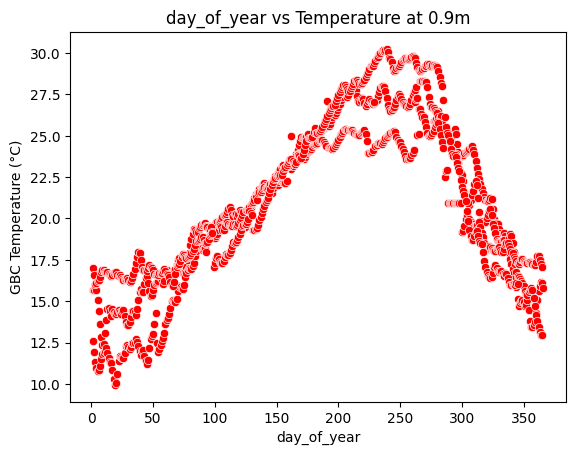

In [23]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['day_of_year'], y=data['GBC Temperature (°C)'],color='r')
plt.title('day_of_year vs Temperature at 0.9m')
plt.show()

In [24]:
data.head()

,Temperature(0.9m),Temperature(1.8m),Air Temp C,day_of_year,Solar Radiation(W/m²),Precipitation (mm),GBC Temperature (°C)
0,25.567,26.171,24.388889,277,487.777778,0.000,25.8690
1,25.713,26.100,25.888889,278,517.777778,0.000,25.9065
2,25.946,26.100,28.111111,279,561.622222,1.524,26.0230
3,26.446,26.158,28.222222,280,560.544444,9.906,26.3020
4,26.663,26.300,22.388889,281,447.777778,0.000,26.4815


In [25]:
# Calculate correlations for the first part of the year (DOY 1-181)
first_half_year = data[data['day_of_year'] <= 181]
correlation_first_half = first_half_year.corr()['GBC Temperature (°C)']

# Calculate correlations for the second part of the year (DOY 182-365)
second_half_year = data[data['day_of_year'] > 181]
correlation_second_half = second_half_year.corr()['GBC Temperature (°C)']

In [26]:
# Print the results
print("Correlations for the First Part of the Year (DOY 1-181):")
print(correlation_first_half)

Correlations for the First Part of the Year (DOY 1-181):
Temperature(0.9m)        0.936123
Temperature(1.8m)        0.868006
Air Temp C               0.789033
day_of_year              0.921920
Solar Radiation(W/m²)    0.789078
Precipitation (mm)       0.022772
GBC Temperature (°C)     1.000000
Name: GBC Temperature (°C), dtype: float64


In [27]:
print("\nCorrelations for the Second Part of the Year (DOY 182-365):")
print(correlation_second_half)


Correlations for the Second Part of the Year (DOY 182-365):
Temperature(0.9m)        0.966514
Temperature(1.8m)        0.930149
Air Temp C               0.826585
day_of_year             -0.810945
Solar Radiation(W/m²)    0.825882
Precipitation (mm)       0.032688
GBC Temperature (°C)     1.000000
Name: GBC Temperature (°C), dtype: float64


In [28]:
#we need subgrade layer for target variable
# Define a function to determine Subgrade Layer based on Air Temp C
def categorize_subgrade(temp):
    if temp < 22:
        return 'Low'
    elif 22 <= temp < 26:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create the Subgrade Layer column
data['Subgrade Layer'] = data['Air Temp C'].apply(categorize_subgrade)

In [29]:
data.drop(columns=['Temperature(0.9m)','Temperature(1.8m)'],inplace=True,axis=1)

In [30]:
data.head()

,Air Temp C,day_of_year,Solar Radiation(W/m²),Precipitation (mm),GBC Temperature (°C),Subgrade Layer
0,24.388889,277,487.777778,0.000,25.8690,Medium
1,25.888889,278,517.777778,0.000,25.9065,Medium
2,28.111111,279,561.622222,1.524,26.0230,High
3,28.222222,280,560.544444,9.906,26.3020,High
4,22.388889,281,447.777778,0.000,26.4815,Medium


In [31]:
data.replace({'Subgrade Layer':{'Low':0,'Medium':1,'High':2}},inplace=True)

In [32]:
#Cleaned dataset
data.head(7)

,Air Temp C,day_of_year,Solar Radiation(W/m²),Precipitation (mm),GBC Temperature (°C),Subgrade Layer
0,24.388889,277,487.777778,0.000,25.8690,1
1,25.888889,278,517.777778,0.000,25.9065,1
2,28.111111,279,561.622222,1.524,26.0230,2
3,28.222222,280,560.544444,9.906,26.3020,2
4,22.388889,281,447.777778,0.000,26.4815,1
5,18.666667,282,373.333333,0.000,26.0540,0
6,18.611111,283,372.222222,0.000,25.4875,0


In [72]:
#segregatting independent and dependent variables
# Define features and target variable
X = data[['Air Temp C', 'Solar Radiation(W/m²)', 'Precipitation (mm)', 'day_of_year']]
y = data[['GBC Temperature (°C)', 'Subgrade Layer']]


In [73]:
# Check for KeyError by printing X and y columns
print("Features (X):", X.columns.tolist())
print("Target (y):", y.columns.tolist())

Features (X): ['Air Temp C', 'Solar Radiation(W/m²)', 'Precipitation (mm)', 'day_of_year']
Target (y): ['GBC Temperature (°C)', 'Subgrade Layer']


In [74]:
X.head() #Independent Features

,Air Temp C,Solar Radiation(W/m²),Precipitation (mm),day_of_year
0,24.388889,487.777778,0.000,277
1,25.888889,517.777778,0.000,278
2,28.111111,561.622222,1.524,279
3,28.222222,560.544444,9.906,280
4,22.388889,447.777778,0.000,281


In [75]:
y.head(7) #Target Features

,GBC Temperature (°C),Subgrade Layer
0,25.8690,1
1,25.9065,1
2,26.0230,2
3,26.3020,2
4,26.4815,1
5,26.0540,0
6,25.4875,0


In [76]:
#Spliting train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
X.shape,X_train.shape,X_test.shape

((1165, 4), (932, 4), (233, 4))

In [78]:
X_train

,Air Temp C,Solar Radiation(W/m²),Precipitation (mm),day_of_year
810,12.500000,250.000000,0.00,356
533,12.611111,252.222222,0.00,79
964,27.944444,558.888889,0.00,145
602,29.888889,597.777778,0.00,148
803,9.222222,184.444444,0.00,349
...,...,...,...,...
1044,33.555556,669.111111,5.08,225
1095,30.333333,606.666667,0.00,276
1130,15.111111,302.222222,0.00,311
860,3.888889,75.277778,6.35,41


In [79]:
#Starndardization (Scaling the data)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
X_train

array([[-0.88403365, -0.87978686, -0.28403316,  1.5390215 ],
       [-0.87145517, -0.86720642, -0.28403316, -1.06975944],
       [ 0.86437498,  0.86889408, -0.28403316, -0.44817265],
       ...,
       [-0.58843938, -0.58414655, -0.28403316,  1.11521232],
       [-1.85886579, -1.86892382,  0.63282008, -1.42764275],
       [-1.02239692, -1.01817168, -0.28403316,  1.07754039]])

In [81]:
X_test

array([[-7.90109680e-02, -9.33207503e-02,  9.26213113e-01,
         9.83360577e-01],
       [-1.22365259e+00, -1.21945869e+00, -2.84033164e-01,
        -1.64425633e+00],
       [-5.00390025e-01, -4.96083485e-01, -2.84033164e-01,
        -9.75579626e-01],
       [-2.73977397e-01, -2.70201714e-01, -2.47359034e-01,
        -1.05092348e+00],
       [ 2.98343412e-01,  3.01075992e-01, -1.74010775e-01,
         7.19657088e-01],
       [ 9.14688899e-01,  9.19215832e-01, -2.84033164e-01,
         2.48758001e-01],
       [-1.07900007e+00, -1.07478365e+00, -2.84033164e-01,
         1.45425966e+00],
       [-9.78786874e-02, -1.20117084e-01,  1.43965093e+00,
        -9.19071736e-01],
       [-4.75647694e-02, -4.31877032e-02, -2.84033164e-01,
        -1.19219321e+00],
       [ 9.65002816e-01,  9.69537585e-01, -2.84033164e-01,
        -2.03305123e-01],
       [-7.51959612e-01, -7.47692252e-01, -2.84033164e-01,
         1.35066186e+00],
       [ 2.60607974e-01,  2.65033037e-01, -2.84033164e-01,
      

In [43]:
# Machine Learning Libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RANSACRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputRegressor

In [44]:
def evaluate_model(y_true, y_pred):
    """Calculate evaluation metrics."""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [47]:
# Define models
models = {
    "Linear Regression": MultiOutputRegressor(LinearRegression()),
    "Robust Linear Regression": MultiOutputRegressor(RANSACRegressor(estimator=LinearRegression())),
    "Complex Tree": MultiOutputRegressor(DecisionTreeRegressor(max_depth=None)),
    "Medium Tree": MultiOutputRegressor(DecisionTreeRegressor(max_depth=5)),
    "Simple Tree": MultiOutputRegressor(DecisionTreeRegressor(max_depth=3)),
    "Linear SVM": MultiOutputRegressor(SVR(kernel='linear')),
    "Quadratic SVM": MultiOutputRegressor(SVR(kernel='poly', degree=2)),
    "Cubic SVM": MultiOutputRegressor(SVR(kernel='poly', degree=3)),
    "Rotational Quadratic GPR": MultiOutputRegressor(GaussianProcessRegressor(kernel=ConstantKernel(1.0) * RBF())),
    "Matern 5/2 GPR": MultiOutputRegressor(GaussianProcessRegressor(kernel=Matern(nu=2.5))),
    "Boosted Trees": MultiOutputRegressor(XGBRegressor()),
    "Bagged Trees": MultiOutputRegressor(RandomForestRegressor())
}

In [48]:
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    """Train and evaluate models."""
    results = {}
    
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        
        try:
            model.fit(X_train, y_train)  # Train the model

            # Make predictions
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            # Evaluate Train and Test dataset
            model_train_metrics = evaluate_model(y_train, y_train_pred)
            model_test_metrics = evaluate_model(y_test, y_test_pred)

            # Store results
            results[model_name] = {
                "train_metrics": model_train_metrics,
                "test_metrics": model_test_metrics
            }

            # Print results
            print(f'{model_name} Performance:')
            print('- Training set:')
            print(f"  - RMSE: {model_train_metrics[1]:.4f}, MAE: {model_train_metrics[0]:.4f}, R2: {model_train_metrics[2]:.4f}")
            print('- Test set:')
            print(f"  - RMSE: {model_test_metrics[1]:.4f}, MAE: {model_test_metrics[0]:.4f}, R2: {model_test_metrics[2]:.4f}")
            print('=' * 30)

        except Exception as e:
            print(f"Error training {model_name}: {e}")

    return results

# Call the function
results = train_and_evaluate(models, X_train, y_train, X_test, y_test)

Training Linear Regression...
Linear Regression Performance:
- Training set:
  - RMSE: 1.8352, MAE: 1.2032, R2: 0.7267
- Test set:
  - RMSE: 1.9333, MAE: 1.2709, R2: 0.6626
Training Robust Linear Regression...
Robust Linear Regression Performance:
- Training set:
  - RMSE: 2.0458, MAE: 1.4278, R2: -0.0471
- Test set:
  - RMSE: 2.1944, MAE: 1.4811, R2: -0.0710
Training Complex Tree...
Complex Tree Performance:
- Training set:
  - RMSE: 0.0298, MAE: 0.0010, R2: 1.0000
- Test set:
  - RMSE: 1.2838, MAE: 0.5903, R2: 0.9203
Training Medium Tree...
Medium Tree Performance:
- Training set:
  - RMSE: 1.0220, MAE: 0.5477, R2: 0.9547
- Test set:
  - RMSE: 1.0785, MAE: 0.5783, R2: 0.9437
Training Simple Tree...
Simple Tree Performance:
- Training set:
  - RMSE: 1.4030, MAE: 0.7808, R2: 0.9147
- Test set:
  - RMSE: 1.3778, MAE: 0.7851, R2: 0.9082
Training Linear SVM...
Linear SVM Performance:
- Training set:
  - RMSE: 1.8431, MAE: 1.1950, R2: 0.7219
- Test set:
  - RMSE: 1.9539, MAE: 1.2765, R2: 0

# Model Performance Summary

## Overview of Model Performance

The following table summarizes the performance of various regression models, including their RMSE, MAE, and R² scores for both the training and test sets.

| Model                             | Train RMSE | Train MAE | Train R² | Test RMSE | Test MAE | Test R² |
|-----------------------------------|------------|-----------|----------|-----------|----------|---------|
| Linear Regression                 | 1.8352     | 1.2032    | 0.7267   | 1.9333    | 1.2709   | 0.6626  |
| Robust Linear Regression           | 2.0458     | 1.4278    | -0.0471  | 2.1944    | 1.4811   | -0.0710 |
| Complex Tree                      | 0.0298     | 0.0010    | 1.0000   | 1.2838    | 0.5903   | 0.9203  |
| Medium Tree                       | 1.0220     | 0.5477    | 0.9547   | 1.0785    | 0.5783   | 0.9437  |
| Simple Tree                       | 1.4030     | 0.7808    | 0.9147   | 1.3778    | 0.7851   | 0.9082  |
| Linear SVM                       | 1.8431     | 1.1950    | 0.7219   | 1.9539    | 1.2765   | 0.6498  |
| Quadratic SVM                    | 1.9997     | 1.3450    | 0.6426   | 1.8480    | 1.2774   | 0.6449  |
| Cubic SVM                        | 2.5696     | 1.7211    | 0.2320   | 2.7004    | 1.8354   | 0.2636  |
| Rotational Quadratic GPR         | 0.0301     | 0.0010    | 1.0000   | 14.7818   | 10.5239  | -10.3966|
| Matern 5/2 GPR                   | 0.0298     | 0.0010    | 1.0000   | 14.7818   | 10.5239  | -10.3966|
| Boosted Trees                     | 0.2192     | 0.1122    | 0.9979   | 1.1141    | 0.5410   | 0.9400  |
| Bagged Trees                      | 0.3938     | 0.2022    | 0.9932   | 1.0149    | 0.5049   | 0.9502  |

## Best Model Selection

Based on the performance metrics, the **Boosted Trees** model exhibits the best balance between training and test performance. It achieves a **Test RMSE** of **1.1141**, **Test MAE** of **0.5410**, and a **Test R²** of **0.9400**, indicating it generalizes well to unseen data.

### Noteworthy Points:
- **Boosted Trees** had a small training error and maintained a relatively low error on the test set, suggesting it is a robust model for this dataset.
- **Bagged Trees** also performed well but slightly lagged behind Boosted Trees.

In [110]:
#Performing with ANN 

# Artifical Neural Network



### Improving Model Performance with Artificial Neural Networks (ANN)

In the quest for enhanced prediction accuracy, we can leverage Artificial Neural Networks (ANNs). ANNs are particularly effective for complex, non-linear relationships within the data, making them a valuable addition to our regression analysis toolkit.

#### Why Use ANN?
1. **Non-linearity**: ANNs can capture intricate patterns that traditional models may overlook.
2. **Flexibility**: With various architectures (e.g., feedforward, convolutional), ANNs can be tailored to specific tasks.
3. **Scalability**: ANNs can handle large datasets effectively, improving their learning capability with more data.


### ANN Model (implementation)

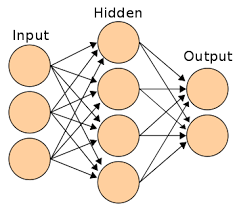

In [71]:
data.head()

,Air Temp C,day_of_year,Solar Radiation(W/m²),Precipitation (mm),GBC Temperature (°C),Subgrade Layer
0,24.388889,277,487.777778,0.000,25.8690,1
1,25.888889,278,517.777778,0.000,25.9065,1
2,28.111111,279,561.622222,1.524,26.0230,2
3,28.222222,280,560.544444,9.906,26.3020,2
4,22.388889,281,447.777778,0.000,26.4815,1


In [82]:
#importing libraries for ANN Model

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [83]:
# Create the ANN model

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2))  # Output layer for GBC Temperature and Subgrade Layer


In [84]:
#Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,962 (11.57 KB)

 Trainable params: 2,962 (11.57 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
# Compile the neural network model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [86]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_split=0.1, verbose=1)


Epoch 1/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 168.3891 - mae: 9.1989 - val_loss: 12.4451 - val_mae: 2.2681
Epoch 2/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.6663 - mae: 2.2156 - val_loss: 9.9919 - val_mae: 1.9438
Epoch 3/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.6597 - mae: 1.8470 - val_loss: 6.3948 - val_mae: 1.5343
Epoch 4/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4961 - mae: 1.5886 - val_loss: 5.3791 - val_mae: 1.3745
Epoch 5/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.6485 - mae: 1.4756 - val_loss: 4.3690 - val_mae: 1.2538
Epoch 6/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7148 - mae: 1.3497 - val_loss: 4.2063 - val_mae: 1.2410
Epoch 7/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1078 - mae: 1.2668 - val_loss: 3.7297 - val_mae: 1.1846
Epoch 8/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4785 - mae: 1.1841 - val_loss: 3.1824 - val_mae: 1.1015
Epoch 9/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [88]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss:.4f}, Model MAE: {mae:.4f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0062 - mae: 0.6034 
Model Loss: 1.1531, Model MAE: 0.6439


In [87]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Mean Squared Error: 1.1531
Mean Absolute Error: 0.6439
R² Score: 0.9032


#### Visualizing the Accuracy,MAE,Loss

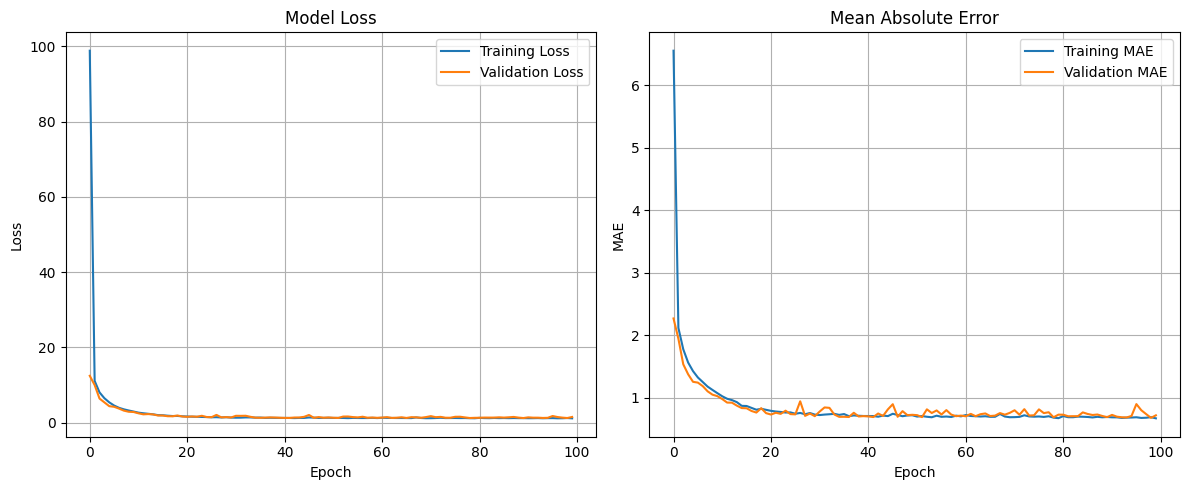

In [111]:
plt.figure(figsize=(12, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plotting Mean Absolute Error
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [109]:
import joblib

# Save the scaler and model
joblib.dump(scaler, 'scaler.pkl')
model.save('temperature_predictor.h5')


In [102]:
data.head(7)

,Air Temp C,day_of_year,Solar Radiation(W/m²),Precipitation (mm),GBC Temperature (°C),Subgrade Layer
0,24.388889,277,487.777778,0.000,25.8690,1
1,25.888889,278,517.777778,0.000,25.9065,1
2,28.111111,279,561.622222,1.524,26.0230,2
3,28.222222,280,560.544444,9.906,26.3020,2
4,22.388889,281,447.777778,0.000,26.4815,1
5,18.666667,282,373.333333,0.000,26.0540,0
6,18.611111,283,372.222222,0.000,25.4875,0


## Predictive System

In [107]:
# Making predictions for a new sample
#inputs order - AirTemp C, Solar radiation, Precipitation, day_of_year

new_data = np.array([[18.666667	,373.333333,0.000,282]])  # Example values
new_data_scaled = scaler.transform(new_data)
predicted_values = model.predict(new_data_scaled)

predicted_gbc_temp = predicted_values[0][0]  # GBC Temperature
predicted_subgrade_layer = predicted_values[0][1]  # Subgrade Layer (continuous value)

#predicted Subgrade Layer into Low, Medium, or High
def categorize_subgrade(predicted_value):
    if predicted_value < 0.5:
        return 'Low'
    elif 0.5 <= predicted_value < 1.5:
        return 'Medium'
    else:
        return 'High'

predicted_subgrade_category = categorize_subgrade(predicted_subgrade_layer)


print(f'Predicted GBC Temperature (°C): {predicted_gbc_temp:.4f}')
print(f'Predicted Subgrade Layer: {predicted_subgrade_category}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Predicted GBC Temperature (°C): 25.2463
Predicted Subgrade Layer: Low


## Reasons for Lower R² Score in ANN

1. **Data Size**:
   - With only **1,100 data points**, the ANN may not have enough data to effectively learn the intricate relationships within the features. ANNs typically require larger datasets to generalize well and avoid overfitting.
   
## Conclusion

While ANNs offer the ability to model complex relationships and interactions in data, the performance in this case reflects the limitations imposed by the smaller dataset size. For future work, increasing the dataset size or exploring data augmentation techniques could help improve the ANN's performance. Additionally, careful tuning of hyperparameters and model complexity may lead to better results.